University of Helsinki, Department of Mathematics and Statistics  
MAST32001 Computational Statistics I, Autumn 2018  
Antti Honkela  

# Week 1 exercises

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

## 1. Input ranges for overflow and underflow

i. Write a program to find the largest integer for which exp() over double precision floating point numbers (float64) returns a finite value.

ii. The logistic function $ \phi(x) = \frac{1}{1 + \exp(-x)} $ is often used to map the real line to probabilities in the range [0, 1], for example in logistic regression. For reals, the equation $ \phi(x) = 1 $ has no solution, but the same is not true for floating point numbers on a computer. Write a program to determine the smallest integer $ x $ for which $ \phi(x) =_F 1$ when using double precision floating point (float64) arithmetic.

(Note: "Write a program" means you should not try out all values manually, but program the computer to find the solution.)

In [52]:
import numpy as np
x = np.float64(1)
while(np.exp(x) != np.inf):
    if(np.exp(x+1) == np.inf):
        break
    x = x+1
print(x)

y = 0

def func(y):
    z = np.float64(1)/(np.float64(1)+np.float64(np.exp(-y)))
    return z

t=func(y)
print(t)
while(t != np.float64(1)):
    y = y+1
    t = func(y)
print(y)

709.0
0.5
37


## 2. Numerical computation of binomial probabilities

Write a computer program to compute sums of binomial probabilities:
$$ f(l, u, n, p) = \sum_{i=l}^u \binom{n}{i} p^i (1-p)^{n-i}. $$
Use it to compute

i. $ f(0, 5, 10, 0.25) = \sum_{i=0}^{5} \binom{10}{i} 0.25^i 0.75^{10-i} $

ii. $ f(10, 20, 20, 0.25) = \sum_{i=10}^{20} \binom{20}{i} 0.25^i 0.75^{20-i} $

iii. $ f(40, 60, 100, 0.25) = \sum_{i=40}^{60} \binom{100}{i} 0.25^i 0.75^{100-i} $

iv. $ f(75, 100, 100, 0.25) = \sum_{i=75}^{100} \binom{100}{i} 0.25^i 0.75^{100-i} $


In [1]:
import scipy.special
import numpy as np

def binprob(l,u,n,p):
    x = 0
    iii = np.arange(l, u+1)
    for i in iii:
        x = x + scipy.special.binom(n,i)*np.power(p,i)*np.power((1-p),(n-i))
    return x

f1 = binprob(0,5,10,0.25)
f2 = binprob(10,20,20,0.25)
f3 = binprob(40,60,100,0.25)
f4 = binprob(75,100,100,0.25)

print(f1)
print(f2)
print(f3)
print(f4)

0.9802722930908203
0.01386441694376117
0.0006865922079343078
1.435085273801797e-25


## 3. Numerical evaluation of multivariate normal probabilities

Consider the $d$-variate normal distribution $\mathcal{N}(x;\; \mu, \Sigma)$ with the log-probability density
$$ \ln p(x;\; \mu, \Sigma) = -\frac{d}{2} \ln(2 \pi) - \frac{1}{2} \ln |\det \Sigma| - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu). $$
Let $\mu = \begin{pmatrix}0 \\ 0\end{pmatrix}$, $\Sigma = \begin{pmatrix}2^2 & 2\rho \\ 2\rho & 1\end{pmatrix}$.

Evaluate the following probabilities:

i. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.8$

ii. $ \ln p( \begin{pmatrix}0 \\ 0\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iii. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = 0.999$

iv. $ \ln p( \begin{pmatrix}1 \\ 1\end{pmatrix} ; \; \mu, \Sigma), $ when $\rho = -0.999$

In [82]:
import scipy.special
import numpy as np

d=2
mu = mu = np.array([0,0])[np.newaxis]
x0 = mu
x1 = np.array([1,1])[np.newaxis]


def initSigma(p, d):
    sigma = np.array([np.power(2,2),2*p,2*p,1]).reshape(d,d)
    #print('sigma')
    #print(sigma)
    return sigma

def logdetsig(L, d):
    sum = 0
    for j in range(d):
        sum = sum+np.log(L[j,j])
    #print('determinantti')
    #print(2*sum)
    return 2*sum

def calcLnd(x, mu, d, L, det):
    arr = (x-mu).T
    #print('x-mu')
    #print(arr)
    z =  scipy.linalg.solve_triangular(L, arr, lower=True)
    z = np.linalg.norm(z)**2
    #print('solved')
    #print(z)
    res = -0.5*d*np.log(2*np.pi) - 0.5*det - 0.5*z
    return res

def LND(x, mu, p):
    sigma = initSigma(p,d)
    L = np.linalg.cholesky(sigma)
    det = logdetsig(L,d)
    res = calcLnd(x,mu,d,L,det)
    return res

i = LND(mu,mu, 0.8)
ii = LND(mu,mu,0.999)
iii = LND(x1,mu, 0.999)
iv = LND(x1,mu,-0.999)

print(i)
print(ii)
print(iii)
print(iv)

-2.0201986232033
0.5765298647626529
-62.204860830585844
-561.9547357680613


## 4. Rejection sampling of Beta(2, 3)

Write a programme to draw samples from the Beta(2, 3) distribution
$ p(x) = 12 x (1-x)^2, \quad 0 \le x \le 1 $  
using the uniform distribution on the interval (0, 1) as the proposal distribution $q(x)$.

Remember that you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is a good way to start looking for one.

Plot a normed histogram of your samples together with the density to check that they match.

Draw at least 10000 samples from the distribution and report your estimate of $ \mathrm{E}[x^5] $ for $ x \sim \mathrm{Beta}(2, 3)$.

NB: Please report the actual value you obtain to Moodle, not your guess of the true value. Values within the expected Monte Carlo error will be accepted as correct.

sample [0.41468072]
psample [0.7159236]
0.04754810864767954


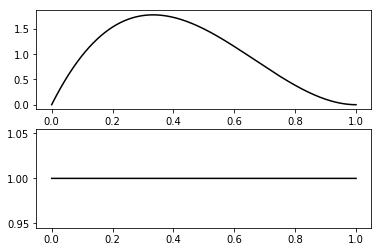

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


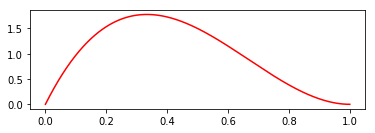

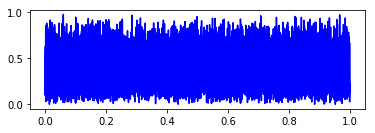

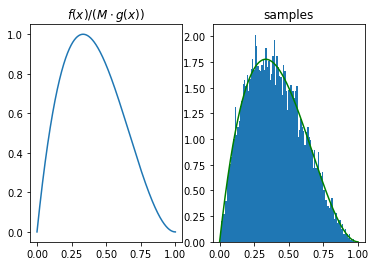

In [24]:
import scipy.special
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.preprocessing import normalize

npr.seed(2349678)

def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    i = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0,1)
        #x_prop = npr.randint(0,N)

        if(u*M*g_pdf(x_prop) < f_pdf(x_prop)):
            x[i] = x_prop
            i += 1
    return x

def p(x):
    return 12*x*(1-x)**2
 
def q(x):
    return np.ndarray(1)

def sample():
    return npr.random(1)

N=10000
t = np.linspace(0, 1, N)
M=np.max(p(x)/q(x))

print('sample ' + str(sample()))
print('psample ' + str(p(sample())))
res = RejectionSampler(p, q, sample, M, N)
print(np.mean(res**5))

plt.figure(11)
plt.subplot(211)
plt.plot(t,p(t), 'k')
plt.subplot(212)
plt.plot(t,qq(t), 'k')
plt.show()

plt.figure(12)
plt.subplot(211)
plt.plot(t,p(t)/q(t), 'r')

plt.figure(13)
plt.subplot(211)
plt.plot(t,res, 'b')

fig, ax = plt.subplots(1, 2)
ax[0].plot(t, p(t) / (M*q(t)))
ax[0].set_title('$f(x) / (M \cdot g(x))$')
ax[1].hist(res, 100, normed=True)
ax[1].plot(t, p(t), 'g')
ax[1].set_title('samples')
plt.show()


## 5. Rejection sampling of a Gaussian with Laplace

Consider the standard Laplace(0, 1) distribution defined by
$ q(x) = 1/2 \exp(- | x | ) $, and the standard normal distribution defined by
$ p(x) = \frac{1}{\sqrt{2 \pi}} \exp( - \frac{1}{2} x^2 )$.

1. Write a program to draw samples from the Laplace(0, 1) distribution. (Hint: transformation considered on Lecture 2.) Test your program by comparing the normed histogram of the samples with the density.
2. Design a method to draw samples from the standard normal using the standard Laplace distribution as the proposal. (Hint: you need to find a constant $M$ such that $p(x) \le M q(x)$ for all $x$. Plotting the function $p(x)/q(x)$ is again useful for looking for one.)
3. Use 10000 samples to compute the expectation $ E[x^4] $ for $ x $ following the standard normal distribution.
4. Assuming the underlying uniform random generator uses full 53 bits of precision of float64, what is the largest value the rejection sampling method could in theory generate? Compare this with the value for Box-Muller transform computed on Lecture 2.

res
2.9437839484454753
2.943783948445451


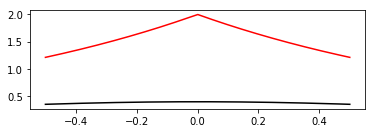

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


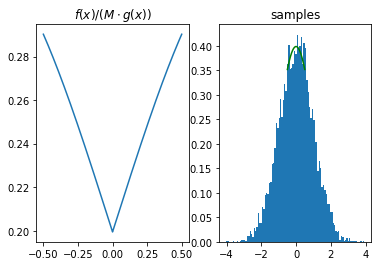

0.3989422804014327
36.04365338911715
0.49999999999999994


In [140]:
import scipy.special
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import uniform
from sklearn.preprocessing import normalize

npr.seed(278)

def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    i = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0,1)
        if(u*M*g_pdf(x_prop) < f_pdf(x_prop)):
            x[i] = x_prop
            i += 1
    return x

def laplace2(x):
    return 0.5*np.exp(-np.abs(x))

def normpdf(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)

def q(x):
    #return ss.laplace.pdf(x)
    return laplace2(x)
 
def p(x):
    #return ss.norm.pdf(x)
    return normpdf(x)

def sample():
    return ss.laplace.ppf(npr.random())

N=10000
linrange = 0.5
t = np.linspace(-linrange,linrange, N)
#m = np.linspace(-2,2,N**2.1)
#M=np.max(p(t)/q(t))
M=4

#print('sample ' + str(sample()))
#print('psample ' + str(p(sample())))
res = RejectionSampler(p, q, sample, M, N)
print('res')
print(np.mean(res**4))

exp = 0
for sample in res:
    exp = exp + np.power(sample,4)
exp = exp/N
print(exp)

plt.figure(11)
plt.subplot(211)
plt.plot(t,p(t), 'k')
plt.plot(t,M*q(t), 'r')
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].plot(t, p(t) / (M*q(t)))
ax[0].set_title('$f(x) / (M \cdot g(x))$')
ax[1].hist(res, 100, normed=True)
ax[1].plot(t, p(t), 'g')
ax[1].set_title('samples')
plt.show()

#In theory the maximum value the rejection sampler can output sit the maximum value of the target function.
#So in this case, max(laplace(0,1)) = 0.5 <<< NOOOPE
#More generally argmax_[x_prop](max(u|u<1)*M*max(f_pdf(x_prop)))


print(np.max(p(m)))
print(laplace(0))
print(ss.laplace.ppf(2**(-53))*-1)
print(laplace2(2**(-53)))

In [82]:
print()

5) 8.571674348652905
